In [37]:
import numpy as np
import pandas as pd
import matplotlib
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.tree import plot_tree, export_text
%matplotlib inline

In [38]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Loading the row data

https://governmentofbc.maps.arcgis.com/home/item.html?id=ba047e4a9bd24beb9ca6e94c05eddef9&sublayer=0

In [39]:
# load the preprocessed CSV data
covid_raw = pd.read_csv('covid19-download.csv')

In [40]:
covid_raw

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
0,35,Ontario,Ontario,2020-01-31,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,59,British Columbia,Colombie-Britannique,2020-01-31,NaN,1,0.0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,1,Canada,Canada,2020-01-31,NaN,4,0.0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,35,Ontario,Ontario,2020-02-08,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,59,British Columbia,Colombie-Britannique,2020-02-08,NaN,4,0.0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9757,60,Yukon,Yukon,2021-12-17,1.0,1621,NaN,14.0,1621,NaN,...,0.00,41.0,95.38,0.0,0.00,6.0,13.63,0.0,0.00,23.26
9758,61,Northwest Territories,Territoires du Nord-Ouest,2021-12-17,1.0,2082,NaN,12.0,2082,NaN,...,0.00,12.0,26.37,0.0,0.00,2.0,3.77,0.0,0.00,0.00
9759,62,Nunavut,Nunavut,2021-12-17,1.0,676,NaN,4.0,676,NaN,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
9760,99,Repatriated travellers,Voyageurs rapatriés,2021-12-17,NaN,13,NaN,0.0,13,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN


In [41]:
covid_raw_bc= covid_raw.drop(covid_raw[covid_raw.prname != 'British Columbia'].index)

In [42]:
covid_raw_bc

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
1,59,British Columbia,Colombie-Britannique,2020-01-31,NaN,1,0.0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,59,British Columbia,Colombie-Britannique,2020-02-08,NaN,4,0.0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
7,59,British Columbia,Colombie-Britannique,2020-02-16,NaN,5,0.0,0.0,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
10,59,British Columbia,Colombie-Britannique,2020-02-21,NaN,6,0.0,0.0,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
13,59,British Columbia,Colombie-Britannique,2020-02-24,NaN,6,0.0,0.0,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9687,59,British Columbia,Colombie-Britannique,2021-12-13,1.0,223142,NaN,2386.0,223142,NaN,...,1.02,2612.0,50.09,24.0,0.46,373.0,7.16,3.0,0.07,22.30
9702,59,British Columbia,Colombie-Britannique,2021-12-14,1.0,223661,NaN,2386.0,223661,NaN,...,1.02,2805.0,53.79,23.0,0.44,401.0,7.68,3.0,0.06,5.68
9717,59,British Columbia,Colombie-Britannique,2021-12-15,1.0,224245,NaN,2393.0,224245,NaN,...,1.02,3010.0,57.72,24.0,0.46,430.0,8.25,3.0,0.07,5.64
9732,59,British Columbia,Colombie-Britannique,2021-12-16,1.0,224998,NaN,2396.0,224998,NaN,...,0.98,3422.0,65.62,18.0,0.35,489.0,9.37,3.0,0.05,6.16


In [43]:
#drop 3 first columns from original dataset and create a list of columns as "covid_bc_new"
covid_bc_new = list(covid_raw_bc.columns)[3:]

In [44]:
print(covid_bc_new)

['date', 'update', 'numconf', 'numprob', 'numdeaths', 'numtotal', 'numtested', 'numtests', 'numrecover', 'percentrecover', 'ratetested', 'ratetests', 'numtoday', 'percentoday', 'ratetotal', 'ratedeaths', 'numdeathstoday', 'percentdeath', 'numtestedtoday', 'numteststoday', 'numrecoveredtoday', 'percentactive', 'numactive', 'rateactive', 'numtotal_last14', 'ratetotal_last14', 'numdeaths_last14', 'ratedeaths_last14', 'numtotal_last7', 'ratetotal_last7', 'numdeaths_last7', 'ratedeaths_last7', 'avgtotal_last7', 'avgincidence_last7', 'avgdeaths_last7', 'avgratedeaths_last7', 'raterecovered']


In [45]:
#create "covid_bc" dataset
covid_bc = covid_raw_bc[covid_bc_new].copy()

In [157]:
covid_bc.apply(np.max)

update                       1.00
numconf                 225785.00
numdeaths                 2399.00
numtotal                225785.00
numtested              1044931.00
numtests               4822431.00
numrecover              218960.00
percentrecover              98.40
ratetested              202989.00
ratetests               924758.00
numtoday                  1293.00
percentoday                300.00
ratetotal                 4329.69
ratedeaths                  46.00
numdeathstoday              45.00
percentdeath                 6.80
numtestedtoday           24922.00
numteststoday            25586.00
numrecoveredtoday         3628.00
percentactive              100.00
numactive                12219.00
rateactive                 237.37
numtotal_last14          15195.00
ratetotal_last14           295.18
numdeaths_last14           242.00
ratedeaths_last14            4.70
numtotal_last7            7909.00
ratetotal_last7            153.64
numdeaths_last7            133.00
ratedeaths_las

In [ ]:
'update': 1.0 , 'numconf': 215762 , 'numtotal':225799, 'numtested': np.nan, 'numtests': 4822500, 'numrecover': 218970,
       'percentrecover':96.99, 'ratetested':  77774.721713 , 'ratetests': 924760.0, 'numtoday': 28, 'percentoday': 2.4,
       'ratetotal':79944.470588 , 'ratedeaths':1.750980e+01, 'numdeathstoday':3.4, 'percentdeath':2.37,
       'numtestedtoday':3.195508e+03 , 'numteststoday':7.459576e+03, 'numrecoveredtoday':3.464557e+02, 'percentactive':1.519018e+01,
       'numactive': 3.744517e+03, 'rateactive': 7.252582e+01, 'numtotal_last14':4.906801e+03, 'ratetotal_last14':9.498563e+01,
       'numdeaths_last14':5.237066e+01, 'ratedeaths_last14':1.014022e+00, 'numtotal_last7':2.468298e+03,
       'ratetotal_last7':4.778465e+01, 'numdeaths_last7':2.627445e+01, 'ratedeaths_last7':5.093218e-01,
       'avgtotal_last7':549, 'avgincidence_last7':10.39, 'avgdeaths_last7':4,
       'avgratedeaths_last7':0.03, 'raterecovered':6.06, 'Year':2021, 'Month': 12, 'Day': 18

## Preprocessing

In [47]:
covid_bc.describe()

,update,numconf,numprob,numdeaths,numtotal,numtested,numtests,numrecover,percentrecover,ratetested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
count,358.000000,663.000000,433.0,663.000000,663.000000,3.270000e+02,6.630000e+02,632.000000,632.000000,327.000000,...,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,663.000000
mean,0.793296,79944.470588,0.0,1008.754148,79944.470588,4.003620e+05,1.766410e+06,78879.371835,86.474953,77774.721713,...,1.014022,2468.298107,47.784653,26.274448,0.509322,352.652997,6.826483,3.746057,0.072713,6.392519
std,0.405508,75735.305759,0.0,797.080969,75735.305759,3.314763e+05,1.467261e+06,73559.644816,11.432516,64392.933006,...,1.005615,2036.987625,39.440467,26.670248,0.516653,290.970593,5.634435,3.828494,0.073834,11.345770
min,0.000000,1.000000,0.0,0.000000,1.000000,4.373000e+03,0.000000e+00,186.000000,25.660000,850.000000,...,0.020000,55.000000,1.070000,0.000000,0.000000,8.000000,0.150000,0.000000,0.000000,-49.250000
25%,1.000000,3934.000000,0.0,195.000000,3934.000000,1.235405e+05,2.780925e+05,4427.000000,81.015000,23999.000000,...,0.250000,419.500000,8.150000,6.000000,0.120000,60.250000,1.165000,1.000000,0.020000,0.000000
50%,1.000000,62412.000000,0.0,1104.000000,62412.000000,2.750750e+05,1.604880e+06,62322.500000,89.205000,53436.000000,...,0.800000,2490.500000,48.070000,19.000000,0.370000,355.500000,6.865000,3.000000,0.050000,1.070000
75%,1.000000,147781.000000,0.0,1757.500000,147781.000000,6.701325e+05,2.906194e+06,145735.250000,95.595000,130180.500000,...,1.300000,4030.750000,78.142500,34.000000,0.650000,575.750000,11.162500,5.000000,0.090000,9.495000
max,1.000000,225785.000000,0.0,2399.000000,225785.000000,1.044931e+06,4.822431e+06,218960.000000,98.400000,202989.000000,...,4.700000,7909.000000,153.640000,133.000000,2.580000,1130.000000,21.950000,19.000000,0.370000,70.480000


In [48]:
# no information in "numprob" column
covid_bc.numprob

1       0.0
4       0.0
7       0.0
10      0.0
13      0.0
       ... 
9687    NaN
9702    NaN
9717    NaN
9732    NaN
9747    NaN
Name: numprob, Length: 663, dtype: float64

In [49]:
covid_bc = covid_bc.drop('numprob', axis=1)

In [50]:
covid_bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 1 to 9747
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 663 non-null    object 
 1   update               358 non-null    float64
 2   numconf              663 non-null    int64  
 3   numdeaths            663 non-null    float64
 4   numtotal             663 non-null    int64  
 5   numtested            327 non-null    float64
 6   numtests             663 non-null    int64  
 7   numrecover           632 non-null    float64
 8   percentrecover       632 non-null    float64
 9   ratetested           327 non-null    float64
 10  ratetests            662 non-null    float64
 11  numtoday             663 non-null    int64  
 12  percentoday          663 non-null    float64
 13  ratetotal            663 non-null    float64
 14  ratedeaths           663 non-null    float64
 15  numdeathstoday       663 non-null    fl

In [51]:
# "date" is an object. convert to numeric
import datetime as dt
covid_bc['date'] = pd.to_datetime(covid_bc['date'])

In [52]:
covid_bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 1 to 9747
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 663 non-null    datetime64[ns]
 1   update               358 non-null    float64       
 2   numconf              663 non-null    int64         
 3   numdeaths            663 non-null    float64       
 4   numtotal             663 non-null    int64         
 5   numtested            327 non-null    float64       
 6   numtests             663 non-null    int64         
 7   numrecover           632 non-null    float64       
 8   percentrecover       632 non-null    float64       
 9   ratetested           327 non-null    float64       
 10  ratetests            662 non-null    float64       
 11  numtoday             663 non-null    int64         
 12  percentoday          663 non-null    float64       
 13  ratetotal            663 non-null 

In [53]:
#split the "date" 
covid_bc['Year'] = pd.DatetimeIndex(covid_bc['date']).year
covid_bc['Month'] = pd.DatetimeIndex(covid_bc['date']).month
covid_bc['Day'] = pd.DatetimeIndex(covid_bc['date']).day

In [54]:
covid_bc = covid_bc.drop('date', axis=1)

In [55]:
covid_bc.tail()

,update,numconf,numdeaths,numtotal,numtested,numtests,numrecover,percentrecover,ratetested,ratetests,...,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered,Year,Month,Day
9687,1.0,223142,2386.0,223142,NaN,4768196,217705.0,97.56,NaN,914357.0,...,24.0,0.46,373.0,7.16,3.0,0.07,22.30,2021,12,13
9702,1.0,223661,2386.0,223661,NaN,4778265,218001.0,97.47,NaN,916288.0,...,23.0,0.44,401.0,7.68,3.0,0.06,5.68,2021,12,14
9717,1.0,224245,2393.0,224245,NaN,4790468,218295.0,97.35,NaN,918628.0,...,24.0,0.46,430.0,8.25,3.0,0.07,5.64,2021,12,15
9732,1.0,224998,2396.0,224998,NaN,4805236,218616.0,97.16,NaN,921460.0,...,18.0,0.35,489.0,9.37,3.0,0.05,6.16,2021,12,16
9747,1.0,225785,2399.0,225785,NaN,4822431,218960.0,96.98,NaN,924758.0,...,18.0,0.35,539.0,10.33,3.0,0.05,6.60,2021,12,17


## Input and Target Columns

In [56]:
covid_bc.columns

Index(['update', 'numconf', 'numdeaths', 'numtotal', 'numtested', 'numtests',
       'numrecover', 'percentrecover', 'ratetested', 'ratetests', 'numtoday',
       'percentoday', 'ratetotal', 'ratedeaths', 'numdeathstoday',
       'percentdeath', 'numtestedtoday', 'numteststoday', 'numrecoveredtoday',
       'percentactive', 'numactive', 'rateactive', 'numtotal_last14',
       'ratetotal_last14', 'numdeaths_last14', 'ratedeaths_last14',
       'numtotal_last7', 'ratetotal_last7', 'numdeaths_last7',
       'ratedeaths_last7', 'avgtotal_last7', 'avgincidence_last7',
       'avgdeaths_last7', 'avgratedeaths_last7', 'raterecovered', 'Year',
       'Month', 'Day'],
      dtype='object')

In [57]:
input_cols = ['update', 'numconf', 'numtotal', 'numtested', 'numtests',
       'numrecover', 'percentrecover', 'ratetested', 'ratetests', 'numtoday',
       'percentoday', 'ratetotal', 'ratedeaths', 'numdeathstoday',
       'percentdeath', 'numtestedtoday', 'numteststoday', 'numrecoveredtoday',
       'percentactive', 'numactive', 'rateactive', 'numtotal_last14',
       'ratetotal_last14', 'numdeaths_last14', 'ratedeaths_last14',
       'numtotal_last7', 'ratetotal_last7', 'numdeaths_last7',
       'ratedeaths_last7', 'avgtotal_last7', 'avgincidence_last7',
       'avgdeaths_last7', 'avgratedeaths_last7', 'raterecovered', 'Year',
       'Month', 'Day']
target_col = 'numdeaths'

In [60]:
target_col 

'numdeaths'

In [61]:
inputs = covid_bc[input_cols].copy()
targets = covid_bc[target_col].copy()

In [65]:
targets

1          0.0
4          0.0
7          0.0
10         0.0
13         0.0
         ...  
9687    2386.0
9702    2386.0
9717    2393.0
9732    2396.0
9747    2399.0
Name: numdeaths, Length: 663, dtype: float64

In [66]:
inputs 

,update,numconf,numtotal,numtested,numtests,numrecover,percentrecover,ratetested,ratetests,numtoday,...,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered,Year,Month,Day
1,NaN,1,1,NaN,0,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2020,1,31
4,NaN,4,4,NaN,63,NaN,NaN,NaN,12.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2020,2,8
7,NaN,5,5,NaN,109,NaN,NaN,NaN,21.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2020,2,16
10,NaN,6,6,NaN,166,NaN,NaN,NaN,32.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2020,2,21
13,NaN,6,6,NaN,212,NaN,NaN,NaN,41.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2020,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9687,1.0,223142,223142,NaN,4768196,217705.0,97.56,NaN,914357.0,349,...,24.0,0.46,373.0,7.16,3.0,0.07,22.30,2021,12,13
9702,1.0,223661,223661,NaN,4778265,218001.0,97.47,NaN,916288.0,519,...,23.0,0.44,401.0,7.68,3.0,0.06,5.68,2021,12,14
9717,1.0,224245,224245,NaN,4790468,218295.0,97.35,NaN,918628.0,584,...,24.0,0.46,430.0,8.25,3.0,0.07,5.64,2021,12,15
9732,1.0,224998,224998,NaN,4805236,218616.0,97.16,NaN,921460.0,753,...,18.0,0.35,489.0,9.37,3.0,0.05,6.16,2021,12,16


In [67]:
inputs.isna().sum()

update                 305
numconf                  0
numtotal                 0
numtested              336
numtests                 0
numrecover              31
percentrecover          31
ratetested             336
ratetests                1
numtoday                 0
percentoday              0
ratetotal                0
ratedeaths               0
numdeathstoday           0
percentdeath             0
numtestedtoday         336
numteststoday           17
numrecoveredtoday       31
percentactive            0
numactive                0
rateactive               0
numtotal_last14         29
ratetotal_last14        29
numdeaths_last14        29
ratedeaths_last14       29
numtotal_last7          29
ratetotal_last7         29
numdeaths_last7         29
ratedeaths_last7        29
avgtotal_last7          29
avgincidence_last7      29
avgdeaths_last7         29
avgratedeaths_last7     29
raterecovered            0
Year                     0
Month                    0
Day                      0
d

In [68]:
targets.isna().sum()

0

In [69]:
# Return a subset of the DataFrame’s columns based on the column dtypes.
inputs_col = inputs.select_dtypes(include=np.number).columns.tolist()

### Imputaion
Fill the missing values by calculating the average of up and down columns of missed value

In [70]:
from sklearn.impute import SimpleImputer

In [71]:
imputer = SimpleImputer().fit(inputs[inputs_col])
inputs[inputs_col]= imputer.transform(inputs[inputs_col])

In [72]:
# not missing data
# inputs[inputs_col].isna().sum()

### Scaling Features

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler().fit(inputs[inputs_col])

In [75]:
inputs[inputs_col] = scaler.transform(inputs[inputs_col])

In [76]:
inputs[inputs_col]

,update,numconf,numtotal,numtested,numtests,numrecover,percentrecover,ratetested,ratetests,numtoday,...,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered,Year,Month,Day
1,0.793296,0.000000,0.000000,0.380554,0.000000,0.359702,0.836059,0.380554,0.369792,0.000773,...,0.197552,0.197412,0.307177,0.306261,0.197161,0.196521,0.411342,0.0,0.000000,1.000000
4,0.793296,0.000013,0.000013,0.380554,0.000013,0.359702,0.836059,0.380554,0.000000,0.002320,...,0.197552,0.197412,0.307177,0.306261,0.197161,0.196521,0.411342,0.0,0.090909,0.233333
7,0.793296,0.000018,0.000018,0.380554,0.000023,0.359702,0.836059,0.380554,0.000010,0.000773,...,0.197552,0.197412,0.307177,0.306261,0.197161,0.196521,0.411342,0.0,0.090909,0.500000
10,0.793296,0.000022,0.000022,0.380554,0.000034,0.359702,0.836059,0.380554,0.000022,0.000773,...,0.197552,0.197412,0.307177,0.306261,0.197161,0.196521,0.411342,0.0,0.090909,0.666667
13,0.793296,0.000022,0.000022,0.380554,0.000044,0.359702,0.836059,0.380554,0.000031,0.000000,...,0.197552,0.197412,0.307177,0.306261,0.197161,0.196521,0.411342,0.0,0.090909,0.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9687,1.000000,0.988294,0.988294,0.380554,0.988754,0.994263,0.988452,0.380554,0.988753,0.269915,...,0.180451,0.178295,0.325312,0.321560,0.157895,0.189189,0.597595,1.0,1.000000,0.400000
9702,1.000000,0.990593,0.990593,0.380554,0.990842,0.995616,0.987215,0.380554,0.990841,0.401392,...,0.172932,0.170543,0.350267,0.345413,0.157895,0.162162,0.458782,1.0,1.000000,0.433333
9717,1.000000,0.993179,0.993179,0.380554,0.993372,0.996960,0.985565,0.380554,0.993371,0.451663,...,0.180451,0.178295,0.376114,0.371560,0.157895,0.189189,0.458448,1.0,1.000000,0.466667
9732,1.000000,0.996514,0.996514,0.380554,0.996434,0.998428,0.982953,0.380554,0.996434,0.582367,...,0.135338,0.135659,0.428699,0.422936,0.157895,0.135135,0.462791,1.0,1.000000,0.500000


In [139]:
inputs[inputs_col].columns

Index(['update', 'numconf', 'numtotal', 'numtested', 'numtests', 'numrecover',
       'percentrecover', 'ratetested', 'ratetests', 'numtoday', 'percentoday',
       'ratetotal', 'ratedeaths', 'numdeathstoday', 'percentdeath',
       'numtestedtoday', 'numteststoday', 'numrecoveredtoday', 'percentactive',
       'numactive', 'rateactive', 'numtotal_last14', 'ratetotal_last14',
       'numdeaths_last14', 'ratedeaths_last14', 'numtotal_last7',
       'ratetotal_last7', 'numdeaths_last7', 'ratedeaths_last7',
       'avgtotal_last7', 'avgincidence_last7', 'avgdeaths_last7',
       'avgratedeaths_last7', 'raterecovered', 'Year', 'Month', 'Day'],
      dtype='object')

In [77]:
# Create training and validation sets
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs[inputs_col], 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [86]:
train_inputs

,update,numconf,numtotal,numtested,numtests,numrecover,percentrecover,ratetested,ratetests,numtoday,...,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered,Year,Month,Day
7272,1.000000,0.654559,0.654559,0.380554,0.603574,0.663589,0.999450,0.380554,0.611435,0.013921,...,0.037594,0.038760,0.023173,0.023853,0.052632,0.027027,0.437651,1.0,0.545455,0.133333
5112,1.000000,0.320235,0.320235,0.380554,0.371470,0.303587,0.913528,0.380554,0.376303,0.347254,...,0.285714,0.286822,0.382353,0.382569,0.263158,0.297297,0.482085,1.0,0.090909,0.333333
7062,1.000000,0.651641,0.651641,0.380554,0.589694,0.658063,0.994226,0.380554,0.597374,0.034803,...,0.067669,0.065891,0.079323,0.079358,0.052632,0.054054,0.477073,1.0,0.454545,0.666667
5007,1.000000,0.306682,0.306682,0.380554,0.360670,0.282904,0.879709,0.380554,0.365362,0.359629,...,0.421053,0.422481,0.372549,0.372477,0.421053,0.432432,0.481918,1.0,0.090909,0.100000
4887,1.000000,0.291066,0.291066,1.000000,0.345448,0.267820,0.876822,1.000000,0.349943,0.375097,...,0.511278,0.511628,0.413547,0.414220,0.526316,0.513514,0.480498,1.0,0.000000,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0.793296,0.009881,0.009881,0.076800,0.019935,0.005878,0.553891,0.076799,0.020183,0.006187,...,0.120301,0.120155,0.016043,0.016055,0.105263,0.108108,0.420279,0.0,0.363636,0.133333
1407,0.793296,0.011817,0.011817,0.125972,0.032578,0.009750,0.841765,0.125968,0.032991,0.007734,...,0.015038,0.015504,0.001783,0.001835,0.000000,0.027027,0.412929,0.0,0.454545,0.266667
3867,0.793296,0.112820,0.112820,0.694710,0.211573,0.079036,0.590459,0.694710,0.214319,0.399072,...,0.308271,0.310078,0.564171,0.564679,0.315789,0.297297,0.455274,0.0,0.909091,0.633333
6342,1.000000,0.586189,0.586189,0.380554,0.522284,0.563125,0.928787,0.380554,0.529085,0.539056,...,0.172932,0.174419,0.668449,0.668349,0.157895,0.162162,0.551658,1.0,0.363636,0.100000


In [87]:
val_inputs

,update,numconf,numtotal,numtested,numtests,numrecover,percentrecover,ratetested,ratetests,numtoday,...,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered,Year,Month,Day
4722,1.000000,0.268841,0.268841,0.977877,0.326452,0.241935,0.850151,0.977882,0.330697,0.451663,...,0.488722,0.488372,0.442068,0.442661,0.473684,0.486486,0.411342,1.0,0.000000,0.500000
8502,0.000000,0.812352,0.812352,0.380554,0.775853,0.795776,0.953533,0.380554,0.775850,0.677494,...,0.255639,0.251938,0.606061,0.598624,0.263158,0.243243,0.411342,1.0,0.727273,0.800000
7512,1.000000,0.658328,0.658328,0.380554,0.623649,0.667154,0.998900,0.380554,0.631772,0.060325,...,0.022556,0.023256,0.045455,0.045872,0.000000,0.027027,0.418358,1.0,0.545455,0.666667
5247,1.000000,0.338102,0.338102,0.380554,0.385232,0.318978,0.907341,0.380554,0.390246,0.389791,...,0.218045,0.217054,0.392157,0.392661,0.210526,0.216216,0.411342,1.0,0.090909,0.633333
3792,0.793296,0.098754,0.098754,0.659787,0.200476,0.067261,0.565988,0.659789,0.203078,0.509667,...,0.105263,0.104651,0.508021,0.508257,0.105263,0.108108,0.411342,0.0,0.909091,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,0.793296,0.017419,0.017419,0.223797,0.057340,0.014476,0.818944,0.223796,0.058075,0.040990,...,0.000000,0.000000,0.030303,0.030275,0.000000,0.000000,0.417523,0.0,0.636364,0.200000
3342,0.793296,0.049552,0.049552,0.511547,0.143616,0.042057,0.800522,0.511549,0.145477,0.119876,...,0.045113,0.046512,0.120321,0.121101,0.052632,0.054054,0.432473,0.0,0.818182,0.500000
3657,0.793296,0.075949,0.075949,0.617409,0.182048,0.058732,0.692191,0.617412,0.184411,0.455530,...,0.090226,0.089147,0.344920,0.345413,0.105263,0.081081,0.448509,0.0,0.909091,0.166667
22,0.793296,0.000027,0.000027,0.380554,0.000077,0.359702,0.836059,0.380554,0.000065,0.000000,...,0.197552,0.197412,0.307177,0.306261,0.197161,0.196521,0.411342,0.0,0.090909,0.866667


In [88]:
train_targets

7272    1759.0
5112    1278.0
7062    1743.0
5007    1240.0
4887    1172.0
         ...  
882      121.0
1407     167.0
3867     331.0
6342    1594.0
1347     167.0
Name: numdeaths, Length: 497, dtype: float64

In [89]:
val_targets

4722    1064.0
8502    1922.0
7512    1763.0
5247    1327.0
3792     290.0
         ...  
2292     195.0
3342     251.0
3657     275.0
22         0.0
1152     157.0
Name: numdeaths, Length: 166, dtype: float64

## Desicion Tree
<img src="https://files.ai-pool.com/a/aba6fb4dcd4c3d01372085631f47d122.png" width=640>

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
# Create the model
tree = DecisionTreeRegressor(max_depth = 5, random_state = 42)

In [92]:
tree.fit(train_inputs, train_targets)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [94]:
X_train = train_inputs
X_val = val_inputs

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

## Prediction and Evaluation the Model

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
tree_train_preds = tree.predict(X_train)

In [97]:
tree_train_rmse = mean_squared_error(train_targets, tree_train_preds, squared=False)
tree_train_rmse

20.136323877423948

In [98]:
tree_val_preds = tree.predict(X_val)

In [99]:
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False) 
tree_val_rmse

26.385326940311835

In [100]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 20.136323877423948, Validation RMSE: 26.385326940311835


### Visualization

In [101]:
from sklearn.tree import plot_tree, export_text

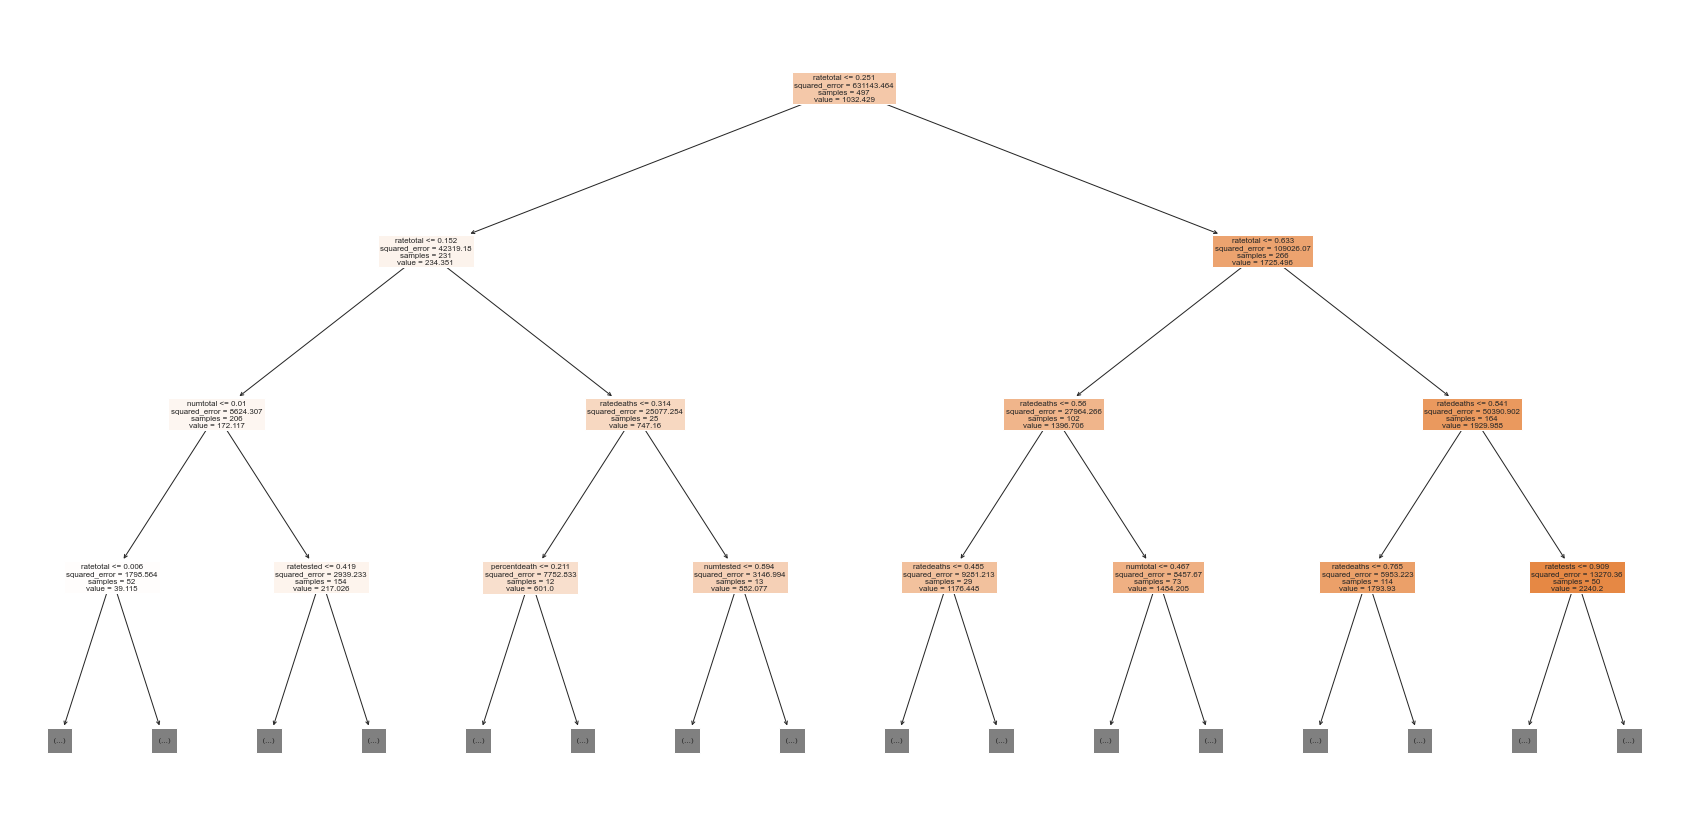

In [104]:
plt.figure(figsize=(30,15))

plot_tree(tree, feature_names=X_train.columns, max_depth=3, filled=True); 

In [105]:
tree_text = export_text(tree, max_depth=3, feature_names=list(X_train.columns))
print(tree_text[:2000])

|--- ratetotal <= 0.25
|   |--- ratetotal <= 0.15
|   |   |--- numtotal <= 0.01
|   |   |   |--- ratetotal <= 0.01
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- ratetotal >  0.01
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- numtotal >  0.01
|   |   |   |--- ratetested <= 0.42
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- ratetested >  0.42
|   |   |   |   |--- truncated branch of depth 2
|   |--- ratetotal >  0.15
|   |   |--- ratedeaths <= 0.31
|   |   |   |--- percentdeath <= 0.21
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- percentdeath >  0.21
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- ratedeaths >  0.31
|   |   |   |--- numtested <= 0.89
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- numtested >  0.89
|   |   |   |   |--- truncated branch of depth 2
|--- ratetotal >  0.25
|   |--- ratetotal <= 0.63
|   |   |--- ratedeaths <= 0.56
|   |   |   |--- ratedeaths <= 0.48
|

In [106]:
# Check feature importance
tree_importances = tree.feature_importances_

In [107]:
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [110]:
tree_importance_df.head(10)

,feature,importance
11,ratetotal,0.958000
12,ratedeaths,0.032307
2,numtotal,0.005753
8,ratetests,0.001763
7,ratetested,0.000923
14,percentdeath,0.000400
3,numtested,0.000332
5,numrecover,0.000207
25,numtotal_last7,0.000200
29,avgtotal_last7,0.000070


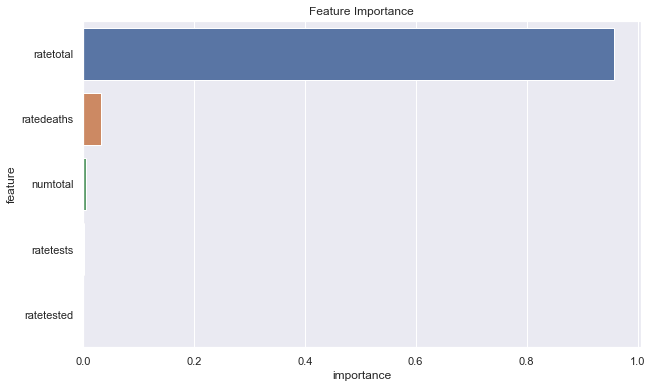

In [112]:
plt.title('Feature Importance')
sns.barplot(data=tree_importance_df.head(5), x='importance', y='feature');

## Random Forests
Train a random forest regressor using the training set.

In [113]:
# Combining the results of many models by "sklearn.ensemble"
from sklearn.ensemble import RandomForestRegressor

In [115]:
# Create and fit the model
rf = RandomForestRegressor(max_depth = 5, n_jobs=-1, random_state=42).fit(X_train, train_targets)

In [116]:
X_train = train_inputs
X_val = val_inputs

#### Make predictions using the random forest regressor.

In [118]:
rf_train_preds = rf.predict(X_train)

In [119]:
rf_train_rmse = mean_squared_error(train_targets, rf_train_preds, squared=False)

In [120]:
rf_val_preds = rf.predict(X_val)

In [121]:
rf_val_rmse = mean_squared_error(val_targets, rf_val_preds, squared=False) 

In [122]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf_train_rmse, rf_val_rmse))

Train RMSE: 11.090463952786443, Validation RMSE: 12.028827223046047


## Hyperparameter Tuning

In [123]:
# define a helper function test_params which can test the given value of one or more hyperparameters.
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [124]:
test_params(n_estimators=20, max_depth=20)

(6.623344863669609, 9.275645010534081)

In [125]:
test_params(max_leaf_nodes=2**5)

(9.898779817199243, 10.661742645281292)

In [126]:
test_params(max_features='log2')

(5.9691651506365195, 9.476165535331901)

In [127]:
test_params(max_features= 'auto')

(5.764582331508539, 6.580645544559631)

In [128]:
test_params(min_samples_split=3, min_samples_leaf=2)

(5.780276669122088, 6.449576434495299)

In [129]:
test_params(bootstrap=True) 

(5.764582331508539, 6.580645544559631)

In [130]:
# reducing power of tree
test_params(min_samples_split=100, min_samples_leaf=60)

(170.3768336754774, 173.51915283400888)

In [131]:
#min_impurity_decrease to control the threshold for splitting nodes. 
test_params(min_impurity_decrease=1e-2)

(5.3909497471201675, 6.837120986264226)

In [132]:
test_params(n_estimators=50, max_depth=10, min_samples_leaf=4, max_features=0.4)

(10.479326741962144, 12.090224220781494)

In [133]:
# define a helper function to test and plot different values of a single parameter.
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

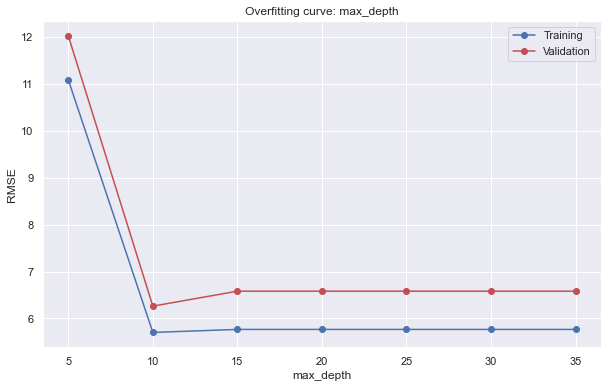

In [136]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

Based on the above graph, the best value for max_depth is around 10, beyond which the model starts to overfit.

## Predictions on Single Inputs

In [137]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df = imputer.transform(input_df)
    input_df = scaler.transform(input_df)
   # input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    return model.predict(input_df)[0]

In [152]:
sample_input = {'update':8.932961e-01 , 'numconf': 215762 , 'numtotal':225799, 'numtested': np.nan, 'numtests': 4822500, 'numrecover': 218970,
       'percentrecover':96.99, 'ratetested':  77774.721713 , 'ratetests': 924760.0, 'numtoday': 28, 'percentoday': 2.4,
       'ratetotal':79944.470588 , 'ratedeaths':2.750980e+01, 'numdeathstoday':3.4, 'percentdeath':2.37,
       'numtestedtoday':5.195508e+03 , 'numteststoday':8.459576e+03, 'numrecoveredtoday':3.464557e+02, 'percentactive':1.519018e+01,
       'numactive': 4.744517e+03, 'rateactive': 7.252582e+01, 'numtotal_last14':5.906801e+03, 'ratetotal_last14':9.998563e+01,
       'numdeaths_last14':6.237066e+01, 'ratedeaths_last14':2.014022e+00, 'numtotal_last7':2.468298e+03,
       'ratetotal_last7':5.778465e+01, 'numdeaths_last7':3.627445e+01, 'ratedeaths_last7':6.093218e-01,
       'avgtotal_last7':549, 'avgincidence_last7':10.39, 'avgdeaths_last7':4,
       'avgratedeaths_last7':0.03, 'raterecovered':6.06, 'Year':2021, 'Month': 12, 'Day': 18
    }

In [154]:
predicted_price = predict_input(rf, sample_input)

C:\Users\bdarv\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\bdarv\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [158]:
print('The predicted number of death in BC is {}'.format(predicted_price))

The predicted number of death in BC is 2111.2374510397535
